In [3]:
import torch
import pandas as pd
from pandas import DataFrame

from skimage import io, transform, color
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import dataset, dataloader, Dataset
from torchvision import transforms, utils

In [2]:
torch.cuda.is_available()

True

In [3]:
# https://github.com/Spandan-Madan/Pytorch_fine_tuning_Tutorial/blob/master/main_fine_tuning.py
# looks how the model is trained

In [ ]:
!wget http://saliency.mit.edu/testSet.zip -O /content/drive/MyDrive/data/testSet.zip

In [ ]:
!unzip /content/drive/MyDrive/data/testSet.zip -d /content/drive/MyDrive/data/q1

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from dataloader import load_data, ImageDataset, Rescale, ToTensor
train_df, test_df = load_data(
    "/content/drive/MyDrive/data/q1/testSet/Stimuli/*/*.jpg"
)
print("Train:", train_df.shape)
print("Test:", test_df.shape)

Train: (1700, 3)
Test: (300, 3)


In [5]:

train_dataset = ImageDataset(train_df,
                                   transform=transforms.Compose([
                                       Rescale((320, 240)),
                                       # RandomCrop(224),
                                       ToTensor()
                                   ]))


test_dataset = ImageDataset(test_df,
                             transform=transforms.Compose([
                                 Rescale((320, 240)),
                                 # RandomCrop(224),
                                 ToTensor()
                             ]))



trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
                                          shuffle=True, num_workers=1)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                          shuffle=True, num_workers=1)



In [8]:
from model import Net
net = Net().to(device)
print(net)


Net(
  (conv1): Conv2d(3, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (local_response_norm): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
  (max_pool1): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (max_pool2): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(512, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv5): Conv2d(512, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv6): Conv2d(512, 256, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv7): Conv2d(256, 128, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
  (conv8): Conv2d(128, 32, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
  (deconv): ConvTranspose2d(32, 1, kernel_size=(8, 8), stride=(4, 4), bias=False)
)


In [48]:
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR, ExponentialLR
import torch.nn as nn

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

scheduler = ExponentialLR(optimizer, gamma=0.9)


In [ ]:
from model import train_model
dataloader = {
    "train": trainloader,
    "val": testloader,
}
dataset_size = {
    "train": len(train_dataset),
    "val": len(test_dataset),
}

res = train_model(data_loader=dataloader, model=net, criterion=criterion, optimizer=optimizer, scheduler=scheduler, device=device, epochs=100, dataset_size=dataset_size)


print(res)


In [ ]:
mm = Net()
mm.load_state_dict(torch.load("./model_01.pth"))
mm.eval()

In [ ]:

i = mm(data['image'].float())
i.shape

In [44]:
sam = i[2, :, :, :]

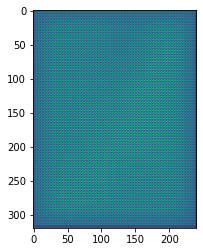

In [45]:
plt.imshow(sam.permute(1, 2, 0).detach().numpy())

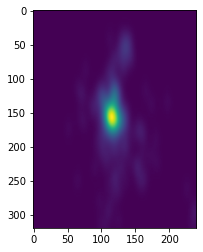

In [47]:

plt.imshow(data['fix_map'][2].permute(1, 2, 0).detach().numpy())

In [43]:
i[0, :, :, :]

tensor([[[ 0.0067,  0.0130, -0.0020,  ...,  0.0027,  0.0025,  0.0056],
         [ 0.0066,  0.0102,  0.0016,  ..., -0.0018, -0.0009,  0.0086],
         [ 0.0078, -0.0058, -0.0010,  ..., -0.0014,  0.0092, -0.0034],
         ...,
         [ 0.0059,  0.0013,  0.0040,  ..., -0.0008, -0.0002, -0.0055],
         [ 0.0007,  0.0133,  0.0017,  ..., -0.0069,  0.0009, -0.0044],
         [-0.0020,  0.0033,  0.0028,  ..., -0.0019, -0.0018,  0.0012]]],
       grad_fn=<SliceBackward0>)